## Model To Classify Whether The Given image is of a Cat Or not##

**Libraries used:-**
- numpy is the fundamental package for scientific computing with Python.
- h5py is a common package to interact with a dataset that is stored on an H5 file.
- matplotlib is a famous library to plot graphs in Python.
- PIL and scipy are used here to test your model with your own picture at the end.


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage

%matplotlib inline

Loading the data into the notebook

In [0]:
train_dataset = h5py.File('data/train_catvnoncat.h5', "r") #fetching the training dataset
test_dataset = h5py.File('data/test_catvnoncat.h5', "r") #fetching the test dataset

Splitting the data into required datasets

In [0]:
train_set_x_orig = np.array(train_dataset["train_set_x"][:]) #initialising i/o of train datasets
train_set_y = np.array(train_dataset["train_set_y"][:])
train_set_y = train_set_y.reshape((1, train_set_y.shape[0]))

test_set_x_orig = np.array(test_dataset["test_set_x"][:]) #initialising i/o of test datasets
test_set_y = np.array(test_dataset["test_set_y"][:])
test_set_y = test_set_y.reshape((1, test_set_y.shape[0]))

classes = np.array(test_dataset["list_classes"][:]) #listing the classes available

**Example of a not cat picture**

y = [0], it's a 'non-cat' picture.


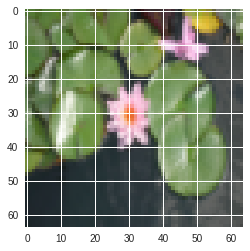

In [26]:
# Example of a not cat picture
index = 26
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

**Example of a cat picture**

y = [1], it's a 'cat' picture.


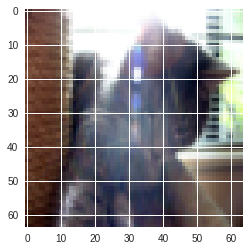

In [0]:
#example of a cat picture
index1 = 42
plt.imshow(train_set_x_orig[index1])
print ("y = " + str(train_set_y[:, index1]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index1])].decode("utf-8") +  "' picture.")

**Setting up the data boundaries**

In [12]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


## Preprocessing the data ##

In [13]:
# Reshape the training and test examples

train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 31 56 22 33]


**normalising the input data**

In [0]:
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

# Activation Functions

**Defininhg Sigmoid activation function**

In [0]:
def sigmoid(z):
   
    s = 1 / (1 + np.exp(-z))
    
    return s

**function for tanh activation**

In [0]:
def tanh(z):
    
    s = (np.exp(z) - np.exp(-z))/(np.exp(z) + np.exp(-z))
    
    return s

**derivative of tanh activation**

In [0]:
def tanhderivative(x):
    
    p = 1 - np.square(x)
    
    return p

**function for RELU activation**

In [0]:
def relu(z):
    
    s = np.maximum(0,z)
    
    return s

**derivative of RELU activation**

In [0]:
def reluderivative(x):
    x[x<=0] = 0
    x[x>0] = 1
    return x


# Core functions

**Initialising the Weights and bais**

In [0]:
def initialize(dim):
    
    w0 = np.random.randn(dim,4) * -0.0045
       
    b0 = np.array([[-0.09245589],[-0.03084864],[ 2.97430533],[ 0.14348648]])
    
    w = np.array([[0.07053791,-0.03902714,-0.06383198,-0.02223341,0.06227877,0.02482021],[0.01409653,-0.01198689,-0.00487828,0.00919972,-0.0021033,-0.0024992],[0.33049453,-0.35033564,-0.43499085,-0.14630707,0.33794503,0.13398395],[-0.37990137,0.39962727,0.31138486,0.16280269,-0.37856172,-0.13991444]])

    b = np.array([[-1.31082753],[1.40171802],[0.52185042],[-0.23284338],[-1.35094358],[0.20734394]])
    

    w1 = np.array([[0.4989533 ],[-0.53453264],[-0.69033548],[-0.20199031],[ 0.50412062],[ 0.1760317 ]])
    
    
    b1 = np.array([[-0.38019911]])
    
    
    
    #these initialization weights is retrived from an earlier iteration of training yielding 67% accuracy so as to reduce the number of epocs required to train
    #please un-comment the below commands if you want to start from first
    
    #w0 = np.random.randn(dim,4) 
    #b0 = np.zeros((4,1))
    #w = np.random.randn(4,6) * 0.01
    #b = np.zeros((6,1))
    #w1 = np.random.randn(6, 1) * 0.01
    #b1 = np.zeros((1,1))

    #assert(w.shape == (4, 6))
    #assert(b.shape == (6,1))
   
    
    return w, b, w1, b1, w0, b0

**BACK PROPAGATION(Function to find the derivatives)**

In [0]:
def propagate(w, b, w1, b1, w0, b0, X, Y):
   
    m = X.shape[1]
    
    A0 = relu(np.dot(w0.T,X) + b0)
    A1 = tanh(np.dot(w.T,A0) + b)
    A = sigmoid(np.dot(w1.T,A1) + b1)
    
    cost = -1 * (np.sum((Y * np.log(A)) + ((1 - Y) * np.log(1 - A))))/m                                 # compute cost
    
    dz1 = A - Y
    dw1 = np.dot(A1,dz1.T)/m
    db1 = np.sum(dz1,axis=1,keepdims=True)/m
    dz = np.dot(w1,dz1) * tanhderivative(A1)
    dw = np.dot(A0,dz.T)/m
    db = np.sum(dz,axis=1,keepdims=True)
    dz0 = np.dot(w,dz) * reluderivative(np.dot(w0.T,X) + b0)
    dw0 = np.dot(X,dz0.T)/m
    db0 = np.sum(dz0,axis=1,keepdims=True)
    

    assert(dw.shape == w.shape)
    assert(db.shape == b.shape)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw1": dw1,
             "db1": db1,
             "dw": dw,
             "db": db,
             "dw0": dw0,
             "db0": db0}
    
    return grads, cost

**function to update the weights and Bais**

In [0]:
def optimize(w, b, w1, b1, w0, b0, X, Y, num_iterations, learning_rate, print_cost = False):
    
    costs = []
    
    
    for j in range(num_iterations):
        
        grads, cost = propagate(w, b, w1, b1, w0, b0, X, Y)
        
        dw = grads["dw"]
        db = grads["db"]
        dw1 = grads["dw1"]
        db1 = grads["db1"]
        db0 = grads["db0"]
        dw0 = grads["dw0"]
        
       
        w1 = w1 - (learning_rate * dw1)
        b1 = b1 - (learning_rate * db1)
        w = w - (learning_rate * dw)
        b = b - (learning_rate * db)
        w0 = w0 - (learning_rate * dw0)
        b0 = b0 - (learning_rate * db0)
        
        if j % 100 == 0:
            costs.append(cost)
        
        if print_cost and j % 200 == 0:
            print ("Cost after iteration %i: %f" %(j , cost))
    
    params = {"w": w,
              "b": b,
              "w1": w1,
              "b1": b1,
              "w0": w0,
              "b0": b0}
    
    grads = {"dw": dw,
             "db": db,
             "dw1": dw1,
             "db1": db1,
             "dw0": dw0,
             "db0": db0}
    
    return params, grads, costs

**function to predict result**

In [0]:
 def predict(w, b, w1, b1, w0, b0, X):
   
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w0 = w0.reshape(X.shape[0], 4)
    
  
    A0 = relu(np.dot(w0.T,X) + b0)
    A1 = tanh(np.dot(w.T,A0) + b)
    A = sigmoid(np.dot(w1.T,A1) + b1)
    
    
    for i in range(A.shape[1]):
        
        Y_prediction = np.around(A)
        
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

**Final model with all functions merged**

In [0]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    
    # initialize weights and bais 
    w, b, w1, b1, w0, b0 = initialize(X_train.shape[0])

    # optimising weights and bais(Gradient descent)
    parameters, grads, costs = optimize(w, b, w1, b1, w0, b0, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    w = parameters["w"]
    b = parameters["b"]
    w1 = parameters["w1"]
    b1 = parameters["b1"]
    w0 = parameters["w0"]
    b0 = parameters["b0"]
    
  
    Y_prediction_train = predict(w, b, w1, b1, w0, b0, X_train)
    Y_prediction_test = predict(w, b, w1, b1, w0, b0, X_test)

    abb = np.mean(np.abs(Y_prediction_train - Y_train)) * 100
    abc = np.mean(np.abs(Y_prediction_test - Y_test)) * 100
    print("train accuracy: {} %".format(100 - abb))
    print("test accuracy: {} %".format(100 - abc))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "w1": w1,
         "b1": b1,
         "w0": w0,
         "b0": b0,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations,
         "abb": abb,
         "abc": abc}
    
    return d

# Training of model

In [25]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 800, learning_rate = 0.01, print_cost = True)

Cost after iteration 0: 0.670272
Cost after iteration 200: 0.504787
Cost after iteration 400: 0.422053
Cost after iteration 600: 0.368824
train accuracy: 88.03827751196172 %
test accuracy: 82.0 %


**Graph for the reducing loss of the training set**

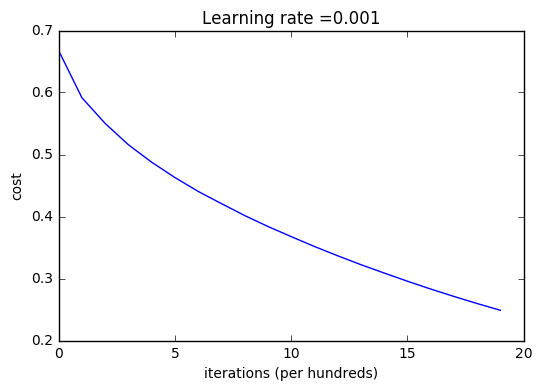

In [0]:
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

## Testing The Model ##

y = 1.0, your algorithm predicts a "cat" picture.


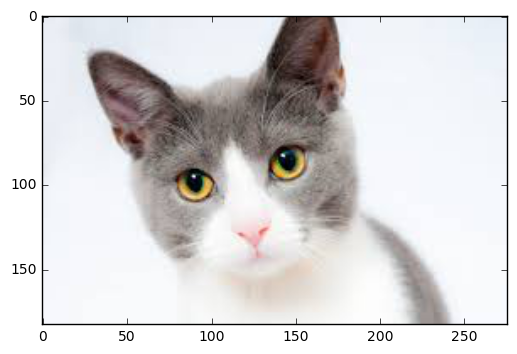

In [0]:
 my_image = "cats.jpeg"  

fname = "testimages/" + my_image
image = np.array(ndimage.imread(fname, flatten=False))
my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((1, num_px*num_px*3)).T
my_predicted_image = predict(d["w"], d["b"], my_image)

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")